# **Common Subwords and Sequences**

### **Longest common subword**

* Given 2 strings, find the (length of the) longest common subword
  - `"secret", "secretary"` -- `"secret"`, length $6$
  - `"bisect", "trisect"` -- `"isect"`, length $5$
  - `"bisect", "secret"` -- `"sec"`, length $3$
  - `"director", "secretary"` -- `"ee", "re"`, length $2$
* Formally
  - $u = a_0a_1...a_{m-1}$
  - $v = b_0b_1...b_{n-1}$
  - Common subword of length $k$ - for some positions $i$ and $j$, $a_ia_{i+1}a_{i+k-1} = b_jb_{j+1}b_{j+k-1}$
  - Find the largest such $k$ - length of the longest common subword

### **Brute force**

* $u = a_0a_1...a_{m-1}$
* $v = b_0b_1...b_{n-1}$
* Find the largest $k$ such that for some positions $i$ and $j$, $a_ia_{i+1}a_{i+k-1} = b_jb_{j+1}b_{j+k-1}$
* Try every pair of starting positions $i$ in $u$, $j$ in $v$
  - Match $(a_i, b_j), (a_{i+1}, b_{j+1})...$ as far as possible
  - Keep track of longest match
* Assuming $m \gt n$, this is $O(mn^2)$
  - $mn$ pairs of starting positions
  - From each starting position, scan could be $O(n)$

### **Inductive structure**

* $u = a_0a_1...a_{m-1}$
* $v = b_0b_1...b_{n-1}$
* Find the largest $k$ such that for some positions $i$ and $j$, $a_ia_{i+1}a_{i+k-1} = b_jb_{j+1}b_{j+k-1}$
* $LCW(i,j)$ - length of the longest common subword in $a_ia_{i+1}...a_{m-1}, b_jb_{j+1}...b_{n-1}$
  - If $a_i \neq b_j$, $LCW(i,j) = 0$
  - If $a_i = b_j$, $LCW(i,j) = 1 + LCW(i+1, j+1)$
  - Base case: $LCW(m, n) = 0$
  - In general, $LCW(i, n) = 0$ for all $0 \leq i \leq m$
  - In general, $LCW(m, j) = 0$ for all $0 \leq j \leq n$

### **Subproblem dependency**

* Subproblems are $LCW(i, j)$, for $0 \leq i \leq m, 0 \leq j \leq n$
* Table of $(m+1).(n+1)$ values
* $LCW(i,j)$ depends on $LCW(i+1, j+1)$
* Start at the bottom right and fill row by row or column by column

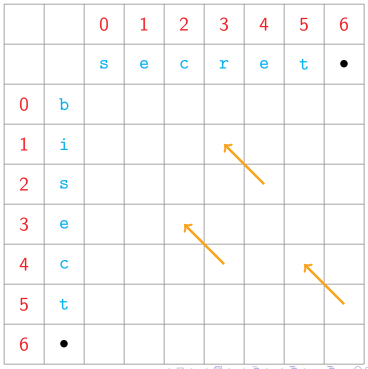

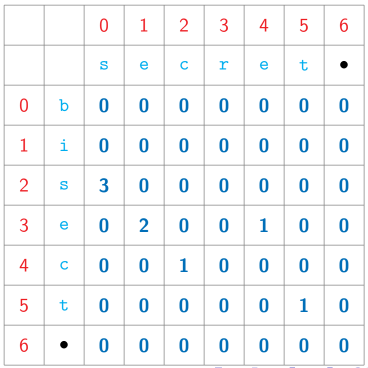

**Reading off the solution**

* Find entry $(i,j)$ with the largest $LCW$ value
* Read off the actual subword diagonally

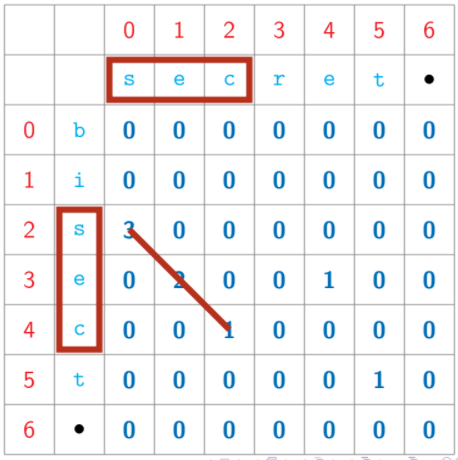

### **Implementation**

In [ ]:
def LCW(u, v):
  import numpy as np
  (m, n) = (len(u), len(v))
  lcw = np.zeros((m + 1, n + 1))
  max_lcw = 0

  for c in range(n - 1, -1, -1):
    for r in range(m - 1, -1, -1):
      if u[r] == v[c]:
        lcw[r, c] = 1 + lcw[r + 1, c + 1]
      else:
        lcw[r, c] = 0
      
      if lcw[r, c] > max_lcw:
        max_lcw = lcw[r, c]
  
  return max_lcw

**Complexity**

* Recall that the brute force was $O(mn^2)$
* Inductive solution is $O(mn)$, using dynamic programming or memoization
  - Fill a table of size $O(mn)$
  - Each table entry takes constant time to compute

### **Longest Common Subsequence**

* **Subsequence** - can drop letters in between
* Given two strings, find the (length of the) longest common subsequence
  - `"secret", "secretary"` - `"secret"`, length $6$
  - `"bisect", "trisect"` -- `"isect"`, length $5$
  - `"bisect", "secret"` -- `"sec"`, length $3$
  - `"director", "secretary"` -- `"ee", "re"`, length $2$
* LCS is the longest path connecting non-zero LCW entries, moving right/down

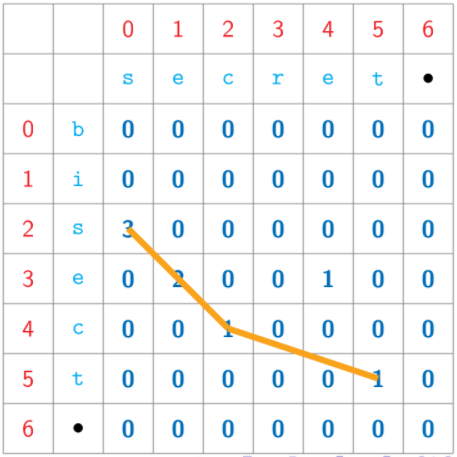

### **Applications**

* Analyzing genes
  - DNA is a long string over `A, T, G, C`
  - Two species are similar if their DNA has long common subsequences
* `diff` command in Unix/Linux
  - Compares text files
  - Find the longest matching subsequence of lines
  - Each line of text is a "character"

### **Inductive structure**

* $u = a_0a_1...a_{m-1}$
* $v = b_0b_1...b_{n-1}$
* $LCS(i, j)$ - length of longest common subsequence in $a_ia_{i+1}...a_{m-1}, b_jb_{j+1}...b_{n-1}$
* If $a_i = b_j, LCS(i, j) = 1 + LCS(i + 1, j + 1)$
  - Can assume $(a_j, b_j)$ is part of $LCS$
* If $a_i \neq b_j, a_i$ and $b_j$ cannot both be part of LCS
  - Which one should we drop?
  - Solve $LCS(i, j + 1)$ and $LCS(i + 1, j)$ and take the minimum
* Base cases as with $LCW$
  - $LCS(i, n) = 0$ for all $0 \leq i \leq m$
  - $LCS(m, j) = 0$ for all $0 \leq j \leq n$

### **Subproblem dependency**

* Subproblems are $LCS(i, j)$, for $0 \leq i \leq m, 0 \leq j \leq n$
* Table of $(m + 1).(n + 1)$ values
* $LCS(i, j)$ depends on $LCS(i + 1, j + 1), LCS(i, j + 1), LCS(i + 1, j)$

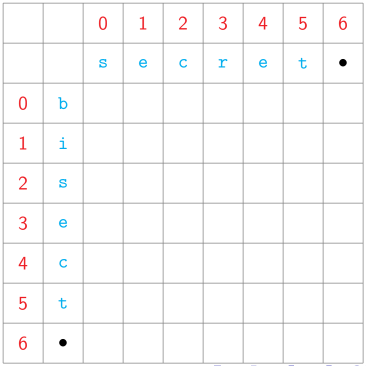

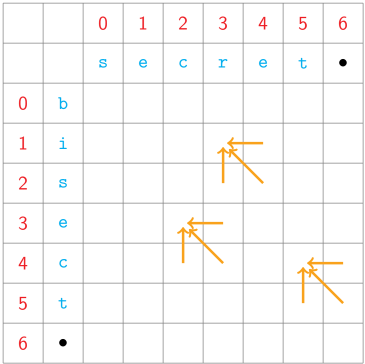

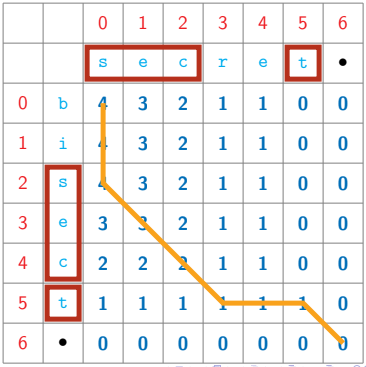

* No dependency for $LCS(m,n)$ - start at bottom right and fill by row, column or diagonal

**Reading off the solution**
* Trace back the path by which each entry was filled
* Each diagonal step is an element of $LCS$

In [ ]:
def LCS(u, v):
  import numpy as np
  (m, n) = (len(u), len(v))
  lcs = np.zeros((m + 1, n + 1))

  for c in range(n - 1, -1, -1):
    for r in range(m - 1, -1, -1):
      if u[r] == v[c]:
        lcs[r, c] = 1 + lcs[r + 1, c + 1]
      else:
        lcs[r, c] = max(lcs[r + 1, c], lcs[r, c + 1])
  
  return lcs[0,0]

**Complexity**

* Again $O(mn)$, using dynamic programming or memoization
  - Fill a table of size $O(mn)$
  - Each table entry takes constant time to compute